In [1]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sb
import os

In [2]:
data_params = json.load(open('data-params.json'))
data_params

{'fasta-path': '/datasets/dsc180a-wi20-public/Genome/resources/hg38',
 'fastq-path': '/datasets/dsc180a-wi20-public/Genome/fastq/testfile/SP1.fq',
 'vcf-paths': ['ALL.chr1.shapeit2_integrated_v1a.GRCh38.20181129.phased.vcf.gz',
  'ALL.chr2.shapeit2_integrated_v1a.GRCh38.20181129.phased.vcf.gz'],
 'renames': ['chr1_filtered.vcf', 'chr2_filtered.vcf'],
 'imterim-path': 'interim'}

In [3]:
env = json.load(open('env.json'))
env

{'docker-image': 'launch-scipy-ml.sh -i ucsdets/dsc180a-genetics "latest"',
 'output-paths': 'outputs'}

In [24]:
data_params['vcf-paths']

['/datasets/dsc180a-wi20-public/Genome/vcf/ALL.chr1.shapeit2_integrated_v1a.GRCh38.20181129.phased.vcf.gz',
 '/datasets/dsc180a-wi20-public/Genome/vcf/ALL.chr2.shapeit2_integrated_v1a.GRCh38.20181129.phased.vcf.gz']

In [9]:
os.system('./fq_to_vcf.sh '+data_params['fasta-path']+' '+data_params['fastq-path']+' '+data_params['imterim-path']+' '+env['output-paths'])

0

In [7]:
os.system('./filter_vcf.sh '+data_params['vcf-paths'][0]+' chr1_filtered.vcf')
os.system('./filter_vcf.sh '+data_params['vcf-paths'][1]+' chr2_filtered.vcf')

#os.system('./zip_vcf.sh chr1_filtered.vcf')
#os.system('./zip_vcf.sh chr1_filtered.vcf')

2

In [11]:
os.system('chmod 700 vcf_to_pca.sh')
os.system('./vcf_to_pca.sh chr1_filtered.vcf chr2_filtered.vcf')

0

In [67]:
vectors = pd.read_csv('interim/pca/merged_pca.eigenvec',delimiter=' ', names=['first','id','x','y'])
vectors = vectors.drop(columns=['first'])

igsr = pd.read_csv('igsr_samples.tsv',delimiter='\t')

In [69]:
igsr = igsr[['Sample name', 'Superpopulation code']].rename(columns={'Sample name': 'id', 'Superpopulation code':'code'})

In [70]:
combined = vectors.set_index('id').join(igsr.set_index('id'), how='inner')

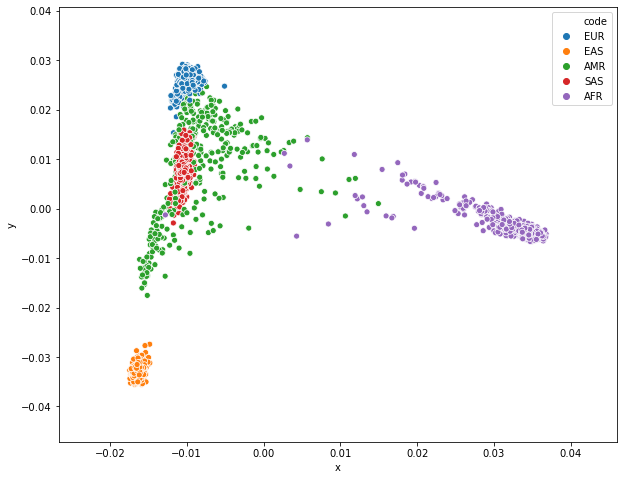

In [86]:
fig, ax = plt.subplots(figsize=(10,8))
pca_plot = sb.scatterplot(x="x", y="y", hue="code", ax=ax, data=combined)
plt.savefig('pca.png')